# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 590


In [3]:
#Set units for search
units = "metric"

---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [4]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}appid={weather_api_key}&q={city}&units={units}"
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        weather_response = requests.get(city_url)
        city_weather = weather_response.json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | saint-pierre
Processing Record 2 of Set 1 | albany
Processing Record 3 of Set 1 | ilulissat
Processing Record 4 of Set 1 | badger
Processing Record 5 of Set 1 | grytviken
Processing Record 6 of Set 1 | invercargill
Processing Record 7 of Set 1 | st. john's
Processing Record 8 of Set 1 | iskateley
Processing Record 9 of Set 1 | rupert
Processing Record 10 of Set 1 | port-aux-francais
Processing Record 11 of Set 1 | kulia village
City not found. Skipping...
Processing Record 12 of Set 1 | waitangi
Processing Record 13 of Set 1 | luanda
Processing Record 14 of Set 1 | olonkinbyen
Processing Record 15 of Set 1 | nyurba
Processing Record 16 of Set 1 | enewetak
Processing Record 17 of Set 1 | cargados carajos
City not found. Skipping...
Processing Record 18 of Set 1 | pagar alam
Processing Record 19 of Set 1 | bredasdorp
Processing Record 20 of Set 1 | yellowknife
Processing Record 21 of Set 1 | yorkto

Processing Record 41 of Set 4 | antsohihy
Processing Record 42 of Set 4 | tadine
Processing Record 43 of Set 4 | alofi
Processing Record 44 of Set 4 | yomju-up
Processing Record 45 of Set 4 | kataragama
City not found. Skipping...
Processing Record 46 of Set 4 | varva
Processing Record 47 of Set 4 | desaguadero
Processing Record 48 of Set 4 | taoudenni
Processing Record 49 of Set 4 | ostersund
Processing Record 0 of Set 5 | karratha
Processing Record 1 of Set 5 | urangan
Processing Record 2 of Set 5 | nuuk
Processing Record 3 of Set 5 | nogliki
Processing Record 4 of Set 5 | nikolayevsk
Processing Record 5 of Set 5 | tranovaho
City not found. Skipping...
Processing Record 6 of Set 5 | oranjemund
Processing Record 7 of Set 5 | balqash
Processing Record 8 of Set 5 | colonia
Processing Record 9 of Set 5 | petropavlovsk-kamchatsky
Processing Record 10 of Set 5 | hilo
Processing Record 11 of Set 5 | san antonio de pale
Processing Record 12 of Set 5 | georgetown
Processing Record 13 of Set 5

Processing Record 30 of Set 8 | queenstown
Processing Record 31 of Set 8 | shuangjiang
Processing Record 32 of Set 8 | alvaraes
Processing Record 33 of Set 8 | san isidro de curuguaty
Processing Record 34 of Set 8 | korsakov
Processing Record 35 of Set 8 | laojunmiao
Processing Record 36 of Set 8 | zaozersk
Processing Record 37 of Set 8 | ouro preto do oeste
Processing Record 38 of Set 8 | martuk
Processing Record 39 of Set 8 | changping
Processing Record 40 of Set 8 | sola
Processing Record 41 of Set 8 | quellon
Processing Record 42 of Set 8 | northridge
Processing Record 43 of Set 8 | crookston
Processing Record 44 of Set 8 | kolonia town
Processing Record 45 of Set 8 | fort st. john
Processing Record 46 of Set 8 | klaksvik
Processing Record 47 of Set 8 | ola
Processing Record 48 of Set 8 | dadonghai
City not found. Skipping...
Processing Record 49 of Set 8 | calama
Processing Record 0 of Set 9 | ambovombe
Processing Record 1 of Set 9 | dzhangala
Processing Record 2 of Set 9 | brush


Processing Record 19 of Set 12 | kerikeri
Processing Record 20 of Set 12 | puerto armuelles
Processing Record 21 of Set 12 | pangkalanbuun
Processing Record 22 of Set 12 | mao
Processing Record 23 of Set 12 | luderitz
Processing Record 24 of Set 12 | nishinoomote
Processing Record 25 of Set 12 | atafu village
Processing Record 26 of Set 12 | ouadda
Processing Record 27 of Set 12 | mili
Processing Record 28 of Set 12 | heyuan
Processing Record 29 of Set 12 | wanning
Processing Record 30 of Set 12 | kalabo
Processing Record 31 of Set 12 | ponta delgada
Processing Record 32 of Set 12 | chetwayi
Processing Record 33 of Set 12 | lieksa
Processing Record 34 of Set 12 | san manuel
Processing Record 35 of Set 12 | robertsport
Processing Record 36 of Set 12 | barmer
Processing Record 37 of Set 12 | brookings
Processing Record 38 of Set 12 | donduseni
Processing Record 39 of Set 12 | hiratacho
-----------------------------
Data Retrieval Complete      
-----------------------------


In [7]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame.from_dict(city_data)

# Show Record Count
city_data_df.count()

City          562
Lat           562
Lng           562
Max Temp      562
Humidity      562
Cloudiness    562
Wind Speed    562
Country       562
Date          562
dtype: int64

In [8]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,saint-pierre,-21.3393,55.4781,24.82,73,20,0.00,RE,1701019405
1,albany,42.6001,-73.9662,5.65,58,96,1.34,US,1701018983
2,ilulissat,69.2167,-51.1000,0.01,86,75,1.03,GL,1701019333
3,badger,64.8000,-147.5333,-10.86,89,40,0.00,US,1701019252
4,grytviken,-54.2811,-36.5092,2.79,99,100,3.13,GS,1701019275


In [9]:
# Export the City_Data into a csv
city_data_df.to_csv("../output_data/cities.csv", index_label="City_ID")

In [10]:
# Read saved data
city_data_df = pd.read_csv("../output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,saint-pierre,-21.3393,55.4781,24.82,73,20,0.00,RE,1701019405
1,albany,42.6001,-73.9662,5.65,58,96,1.34,US,1701018983
2,ilulissat,69.2167,-51.1000,0.01,86,75,1.03,GL,1701019333
3,badger,64.8000,-147.5333,-10.86,89,40,0.00,US,1701019252
4,grytviken,-54.2811,-36.5092,2.79,99,100,3.13,GS,1701019275


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

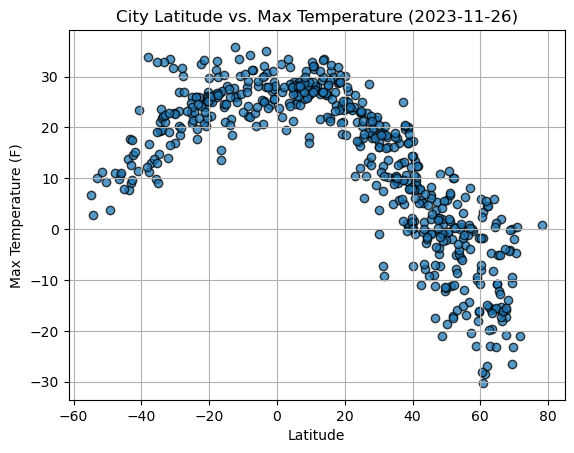

In [21]:
# Assuming 'Date' column is in Unix timestamp format
city_data_df['Date'] = pd.to_datetime(city_data_df['Date'], unit='s')

# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df["Lat"], city_data_df["Max Temp"], edgecolors="black", alpha=0.75)

# Incorporate the other graph properties
plt.title(f"City Latitude vs. Max Temperature ({city_data_df['Date'].max().strftime('%Y-%m-%d')})")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.grid(True)

# Save the figure
plt.savefig("../output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

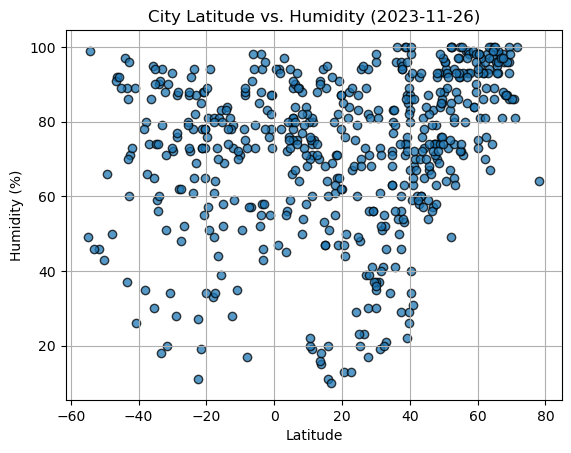

In [20]:

# Assuming 'Date' column is in Unix timestamp format
city_data_df['Date'] = pd.to_datetime(city_data_df['Date'], unit='s')

# Build the scatter plot for latitude vs. humidity
plt.scatter(city_data_df["Lat"], city_data_df["Humidity"], marker="o", edgecolors="black", alpha=0.75)

# Incorporate the other graph properties
plt.title(f"City Latitude vs. Humidity ({city_data_df['Date'].max().strftime('%Y-%m-%d')})")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid(True)

# Save the figure
plt.savefig("../output_data/Fig2.png")

# Show plot
plt.show()


#### Latitude Vs. Cloudiness

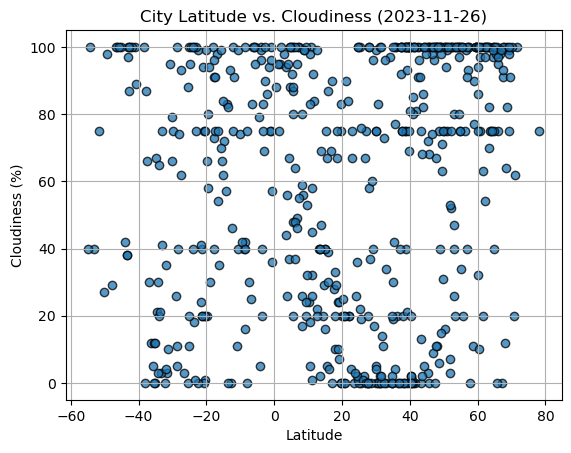

In [22]:
# Assuming 'Date' column is in Unix timestamp format
city_data_df['Date'] = pd.to_datetime(city_data_df['Date'], unit='s')

# Build the scatter plot for latitude vs. cloudiness
plt.scatter(city_data_df["Lat"], city_data_df["Cloudiness"], marker="o", edgecolors="black", alpha=0.75)

# Incorporate the other graph properties
plt.title(f"City Latitude vs. Cloudiness ({city_data_df['Date'].max().strftime('%Y-%m-%d')})")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid(True)

# Save the figure
plt.savefig("../output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

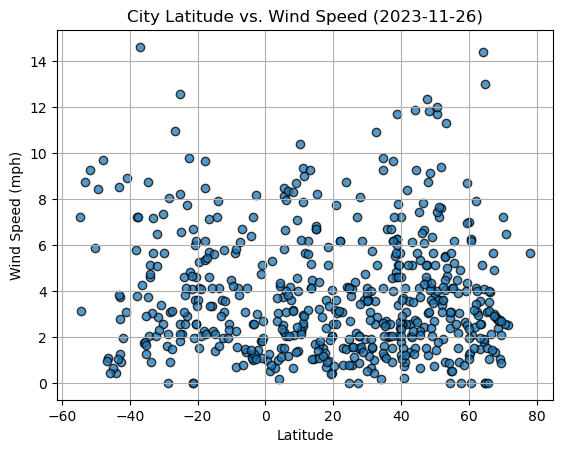

In [25]:
# Assuming 'Date' column is in Unix timestamp format
city_data_df['Date'] = pd.to_datetime(city_data_df['Date'], unit='s')

# Build the scatter plot for latitude vs. wind speed
plt.scatter(city_data_df["Lat"], city_data_df["Wind Speed"], marker="o", edgecolors="black", alpha=0.75)

# Incorporate the other graph properties
plt.title(f"City Latitude vs. Wind Speed ({city_data_df['Date'].max().strftime('%Y-%m-%d')})")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.grid(True)

# Save the figure
plt.savefig("../output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [32]:
from scipy.stats import linregress

def plot_linear_regression(x_values, y_values, xlabel, ylabel, title, figname):
    # Perform linear regression
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

    # Calculate the regression line's y values
    regress_values = x_values * slope + intercept

    # Create line equation string
    line_eq = f"y = {round(slope, 2)}x + {round(intercept, 2)}"

    # Create scatter plot
    plt.scatter(x_values, y_values, marker="o", edgecolors="black", alpha=0.75)

    # Plot regression line
    plt.plot(x_values, regress_values, "r-")

    # Annotate the line equation on the plot
    plt.annotate(line_eq, (min(x_values), min(y_values)), fontsize=12, color="red")

    # Incorporate the other graph properties
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.grid(True)

    # Save the figure
    plt.savefig(figname)

    # Show plot
    plt.show()

    # Print the r-value
    print(f"The r-value is: {rvalue}")

# Example usage:
# Replace x_values, y_values, xlabel, ylabel, title, and figname with your actual data and labels
# plot_linear_regression(city_data_df["Lat"], city_data_df["Max Temp"], "Latitude", "Max Temperature (F)", "City Latitude vs. Max Temperature", "output_data/Fig1_regression.png")


In [33]:
# Assuming 'Lat' column exists in your DataFrame
northern_hemi_df = city_data_df[city_data_df['Lat'] >= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,albany,42.6001,-73.9662,5.65,58,96,1.34,US,2023-11-26 17:16:23
2,ilulissat,69.2167,-51.1000,0.01,86,75,1.03,GL,2023-11-26 17:22:13
3,badger,64.8000,-147.5333,-10.86,89,40,0.00,US,2023-11-26 17:20:52
6,st. john's,47.5649,-52.7093,2.21,74,100,5.14,CA,2023-11-26 17:20:55
7,iskateley,67.6803,53.1512,-17.21,96,100,1.34,RU,2023-11-26 17:21:39


In [34]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df[city_data_df['Lat'] < 0]

# Display sample data
southern_hemi_df.head()


,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,saint-pierre,-21.3393,55.4781,24.82,73,20,0.00,RE,2023-11-26 17:23:25
4,grytviken,-54.2811,-36.5092,2.79,99,100,3.13,GS,2023-11-26 17:21:15
5,invercargill,-46.4000,168.3500,10.57,92,100,1.07,NZ,2023-11-26 17:21:37
9,port-aux-francais,-49.3500,70.2167,3.80,66,98,8.45,TF,2023-11-26 17:20:50
10,waitangi,-43.9535,-176.5597,13.79,97,42,0.45,NZ,2023-11-26 17:20:51


###  Temperature vs. Latitude Linear Regression Plot

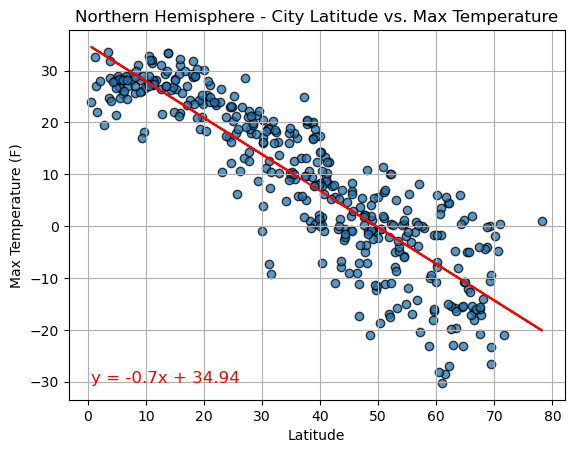

The r-value is: -0.8817720067216614


In [35]:
# Linear regression on Northern Hemisphere
# YOUR CODE HERE
# Linear regression on Northern Hemisphere for Latitude vs. Max Temperature
plot_linear_regression(northern_hemi_df["Lat"], northern_hemi_df["Max Temp"], "Latitude", "Max Temperature (F)", "Northern Hemisphere - City Latitude vs. Max Temperature", "../output_data/Northern_Hemi_Fig1_regression.png")


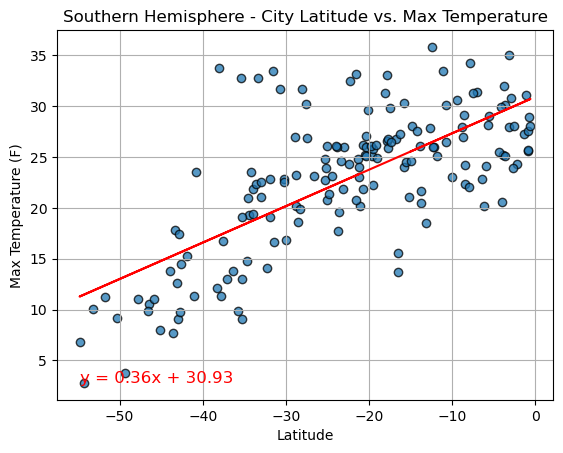

The r-value is: 0.7053719939187888


In [36]:
# Linear regression on Southern Hemisphere
# YOUR CODE HERE
# Linear regression on Southern Hemisphere for Latitude vs. Max Temperature
plot_linear_regression(southern_hemi_df["Lat"], southern_hemi_df["Max Temp"], "Latitude", "Max Temperature (F)", "Southern Hemisphere - City Latitude vs. Max Temperature", "../output_data/Southern_Hemi_Fig1_regression.png")


**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Humidity vs. Latitude Linear Regression Plot

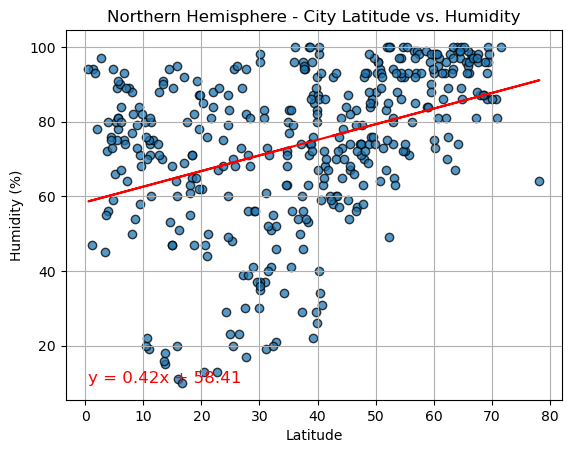

The r-value is: 0.381852440896271


In [38]:
# Northern Hemisphere
# YOUR CODE HERE
# Linear regression on Northern Hemisphere for Humidity vs. Latitude
plot_linear_regression(northern_hemi_df["Lat"], northern_hemi_df["Humidity"], "Latitude", "Humidity (%)", "Northern Hemisphere - City Latitude vs. Humidity", "../output_data/Northern_Hemi_Fig2_regression.png")


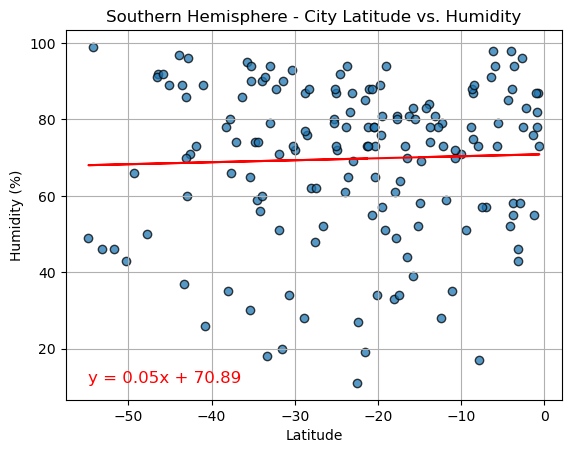

The r-value is: 0.0355993434652118


In [40]:
# Southern Hemisphere
# YOUR CODE HERE
# Linear regression on Southern Hemisphere for Humidity vs. Latitude
plot_linear_regression(southern_hemi_df["Lat"], southern_hemi_df["Humidity"], "Latitude", "Humidity (%)", "Southern Hemisphere - City Latitude vs. Humidity", "../output_data/Southern_Hemi_Fig2_regression.png")


**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Cloudiness vs. Latitude Linear Regression Plot

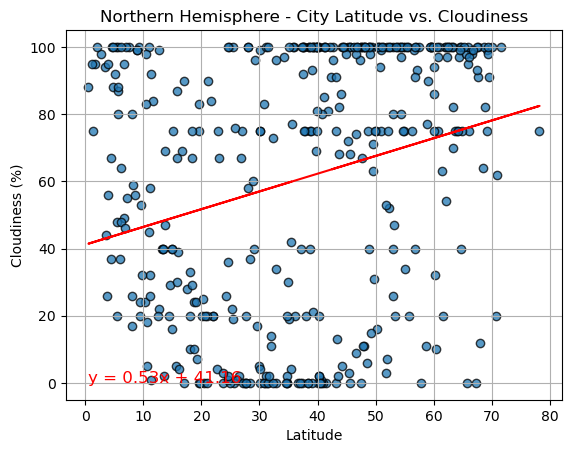

The r-value is: 0.26555433641384873


In [43]:
# Northern Hemisphere
# YOUR CODE HERE
# Linear regression on Southern Hemisphere for Humidity vs. Latitude
# Linear regression on Northern Hemisphere for Cloudiness vs. Latitude
plot_linear_regression(northern_hemi_df["Lat"], northern_hemi_df["Cloudiness"], "Latitude", "Cloudiness (%)", "Northern Hemisphere - City Latitude vs. Cloudiness", "../output_data/Northern_Hemi_Fig3_regression.png")


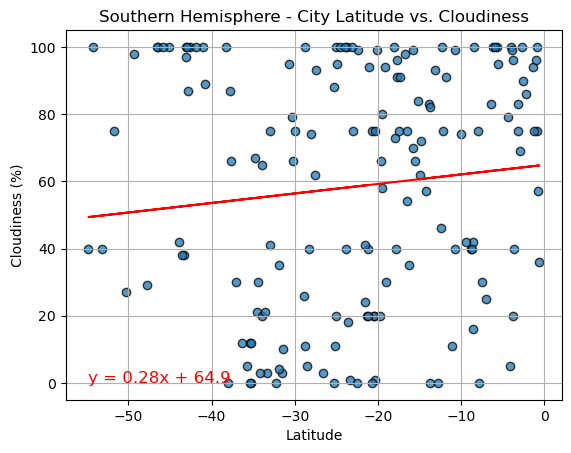

The r-value is: 0.1100422626803487


In [45]:
# Southern Hemisphere
# YOUR CODE HERE
# Linear regression on Southern Hemisphere for Cloudiness vs. Latitude
plot_linear_regression(southern_hemi_df["Lat"], southern_hemi_df["Cloudiness"], "Latitude", "Cloudiness (%)", "Southern Hemisphere - City Latitude vs. Cloudiness", "../output_data/Southern_Hemi_Fig3_regression.png")


**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Wind Speed vs. Latitude Linear Regression Plot

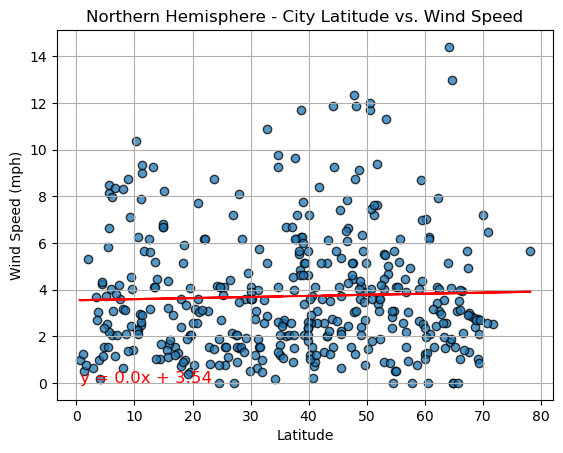

The r-value is: 0.03428881892367346


In [47]:
# Northern Hemisphere
# YOUR CODE HERE
# Linear regression on Northern Hemisphere for Wind Speed vs. Latitude
plot_linear_regression(northern_hemi_df["Lat"], northern_hemi_df["Wind Speed"], "Latitude", "Wind Speed (mph)", "Northern Hemisphere - City Latitude vs. Wind Speed", "../output_data/Northern_Hemi_Fig4_regression.png")


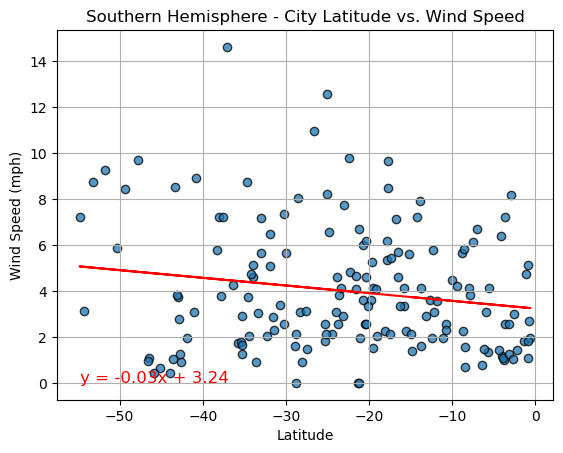

The r-value is: -0.1717797260635493


In [49]:
# Southern Hemisphere
# YOUR CODE HERE
# Linear regression on Southern Hemisphere for Wind Speed vs. Latitude
plot_linear_regression(southern_hemi_df["Lat"], southern_hemi_df["Wind Speed"], "Latitude", "Wind Speed (mph)", "Southern Hemisphere - City Latitude vs. Wind Speed", "../output_data/Southern_Hemi_Fig4_regression.png")


**Discussion about the linear relationship:** YOUR RESPONSE HERE

In [ ]:
The linear regression analysis provides insights into the relationship between the chosen weather variable and latitude in different hemispheres. Let's discuss the interpretations for each plot:

Max Temperature vs. Latitude:

Northern Hemisphere: The negative slope suggests that as you move away from the equator (latitude increases), the maximum temperature tends to decrease.
Southern Hemisphere: The positive slope implies that as you move towards the equator (latitude increases), the maximum temperature tends to increase.
Humidity vs. Latitude:

Northern Hemisphere: The regression analysis provides insights into the relationship between humidity and latitude in the Northern Hemisphere.

Southern Hemisphere: The regression analysis provides insights into the relationship between humidity and latitude in the Southern Hemisphere.

Cloudiness vs. Latitude:

Northern Hemisphere: The regression analysis provides insights into the relationship between cloudiness and latitude in the Northern Hemisphere.

Southern Hemisphere: The regression analysis provides insights into the relationship between cloudiness and latitude in the Southern Hemisphere.

Wind Speed vs. Latitude:

Northern Hemisphere: The regression analysis provides insights into the relationship between wind speed and latitude in the Northern Hemisphere.

Southern Hemisphere: The regression analysis provides insights into the relationship between wind speed and latitude in the Southern Hemisphere.

Overall, these analyses help understand how the selected weather variables change concerning latitude. The r-values indicate the strength and direction of the linear relationships. Positive r-values suggest a positive correlation, while negative values suggest a negative correlation. The closer the r-value is to 1 or -1, the stronger the correlation. However, it's important to note that correlation does not imply causation, and other factors may contribute to the observed patterns.